# Joining Datasets

In [33]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
file_path = 'drive/MyDrive/Doc_classification_cnn/documents/'

In [37]:
text_data = [] 
label = []
for file in os.listdir(file_path):
    l = file.split("_")[0]
    
    path = str(file_path) + str(file)

    with open(path , 'rb') as f:
        line = f.read()
        text_data.append(line)

    label.append(l)

In [38]:
import pandas as pd
data = pd.DataFrame({'text':text_data,'labels':label})

In [39]:
uni_label = list(data['labels'].value_counts().index)
uni_label = sorted(uni_label)

convert_label_to_num = {}

for i, l in enumerate(uni_label):
    convert_label_to_num[l] = i

In [40]:
convert_label_to_num

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [41]:
data['num_label'] = data['labels'].replace(convert_label_to_num)
data.head()

,text,labels,num_label
0,b'From: paul@hsh.com (Paul Havemann)\nSubject:...,talk.politics.misc,18
1,b'From: as010b@uhura.cc.rochester.edu (Tree of...,talk.politics.misc,18
2,b'From: an030@cleveland.Freenet.Edu (Broward H...,talk.politics.misc,18
3,b'From: jmorriso@rflab.ee.ubc.ca (John Paul Mo...,talk.politics.misc,18
4,b'From: kaldis@romulus.rutgers.edu (Theodore A...,talk.politics.misc,18


In [42]:
data.shape

(18828, 3)

In [ ]:
data.to_csv('joined_data.csv')

# Preprocessing Stage

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('all')

In [ ]:
import re
from string import digits

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Doc_classification_cnn')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path=os.path.join(DATADIR, 'joined_data.csv')

In [ ]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,text,labels,num_label
0,0,b'From: paul@hsh.com (Paul Havemann)\nSubject:...,talk.politics.misc,18
1,1,b'From: as010b@uhura.cc.rochester.edu (Tree of...,talk.politics.misc,18
2,2,b'From: an030@cleveland.Freenet.Edu (Broward H...,talk.politics.misc,18
3,3,b'From: jmorriso@rflab.ee.ubc.ca (John Paul Mo...,talk.politics.misc,18
4,4,b'From: kaldis@romulus.rutgers.edu (Theodore A...,talk.politics.misc,18


In [ ]:
df.shape

(18828, 4)

In [ ]:
df.drop(columns = ['Unnamed: 0' , 'labels'], inplace = True)

In [ ]:
df.head()

,text,num_label
0,b'From: paul@hsh.com (Paul Havemann)\nSubject:...,18
1,b'From: as010b@uhura.cc.rochester.edu (Tree of...,18
2,b'From: an030@cleveland.Freenet.Edu (Broward H...,18
3,b'From: jmorriso@rflab.ee.ubc.ca (John Paul Mo...,18
4,b'From: kaldis@romulus.rutgers.edu (Theodore A...,18


In [ ]:
import re
def preprocess_step1_2(line):
# Code reference: https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
    #line = line.lower()

    email = pd.Series(re.findall(r'[\w\.\-\+]+@[\w\.-]+\.\w+', line))
    uni_email = list(email.unique())
    #print(uni_email)

    final_str = ""

    for e in uni_email:
        step1 = e.split("@")[1]
        step2 = step1.split(".")
        
        for ele in step2:
            #print(ele)
            if str(ele.lower()) != "com" and len(ele) >= 3:
                final_str += str(ele)
                final_str += " "

    for mail in uni_email:
        line = line.replace(mail, " ")
    
    return final_str[:-1], line

In [ ]:
def preprocess_step3_4(t2):
    '''t2 = str(df['text'][2000]) '''
    t2_sentence = t2.split('\\n')
    #print(t2_sentence)
    output = ""

    idx = -1

    for s in range(len(t2_sentence)):
        sen = t2_sentence[s]

        if 'Subject:' in sen:
            idx = s
            break

    subject_sen = t2_sentence[idx].split("Subject:")[1]
    #print(subject_sen)

    if "Re:" in subject_sen:
        o = subject_sen.split(":")
        #print(o)

        if len(o) > 2:
            output = " ".join(o[1:])
        else:
            output = o[1]

    else:
        output = subject_sen

    #print(output)

    out = re.sub("[^A-Za-z']"," ", output)
    out = " ".join(out.split())
    #print(out)

    t2 = t2.replace(t2_sentence[idx], " ")
    
    return out, t2

In [ ]:
l = str(df['text'][15901])
print(l)
a,b = preprocess_step3_4(t2 = l)
a

b"From: obl@gabi.ap.mchp.sni.de (Oliver Blankenheim)\nSubject: Subject: Re: 16550 v. 16550A ???\n\n\nIn article <1993Apr22.042310.39296@ns1.cc.lehigh.edu> you write:\n\n> What's the difference between a 16550 UART and a 16550A UART? Thanks!\n\nThe difference is that the 16550 got bugs while the 16550A can be used\nwhithout problems even in fast serial communications. Other sources\nsay that only the 16550AFN from Nat Semi (i.e. not: second sources)\nis really OK.\n\nBest wishes\n\nOliver\n\n\n\n"


''

In [ ]:
def preprocess_step5a(text):
    ''' text = str(df['text'][500]) '''
    sentences = text.split("\\n")

    from_idx = -1

    for s in range(len(sentences)):
        if "From:" in sentences[s]:
            from_idx = s
            break

    if from_idx != -1:
        sentences.pop(from_idx)

    output = " ".join(sentences)
    return output

In [ ]:
def preprocess_step5b(text):
    ''' text = str(df['text'][500]) '''
    sentences = text.split("\\n")

    write_idx = -1

    for s in range(len(sentences)):
        if "Write to:" in sentences[s]:
            from_idx = s
            break

    if write_idx != -1:
        sentences.pop(from_idx)

    output = " ".join(sentences)
    return output

In [ ]:
def step6_7(text, start_mark, close_mark):
    length = len(text)
    p = 0
    p1 = 0
    flag = True
    out = ''
    bracket = ''

    while p < length and flag:
        if text[p] == start_mark:
            p1 = p + 1
            bracket = ''

            while p1 < length:

                if text[p1] == close_mark:
                    p = p1 + 1
                    break
                
                if text[p1] != close_mark:
                    bracket += text[p1]
                    p1 += 1

                if p1+1 == length:
                    flag = False
        
        else:
            out = out + text[p]
            p = p + 1

    if flag == False:
        out = out + bracket

    return out

In [ ]:
def preprocess_step6(text):
    t = step6_7(text , "<", ">")
    return t

def preprocess_step7(text):
    t = step6_7(text, "(", ")")
    return t

In [ ]:
l = str(df['text'][3180])
l1 = preprocess_step6(l)
l2 = preprocess_step7(l1)
l2

'b\'From: scott@uniwa.uwa.edu.au \\nSubject: Re: Doing the work of God??!!)\\n\\nDesiree Bradley  wrote:\\n\\n. . ..\\n\\n: The next Sunday, the sermon was about Joshua 6 .  With those reports about\\n: Bosnia in my mind, I felt uncomfortable about the minister saying that\\n: the massacre  was right.  But what really bothered\\n: me was that, if I was going to try taking Christianity seriously, I\\n: shouldn\\\'t be so troubled about the reports of "ethnic cleansing" in\\n: Bosnia.  Certainly, my sympathies shouldn\\\'t be with the Moslims.\\n: Considering that the Bosnian Muslims are descendants of Christians\\n: who, under Turkish rule, converted to Islam could the Serbs be doing\\n: God\\\'s work?\\n\\nPerhaps it would be useful to ask whether those doing the ethnic\\ncleansing could be said to be loving those they are killing in the very\\nact of killing.  Does it reflect the attitude of God, who sends rain to\\nboth the just and the unjust?  If not, then Christians should be\\nun

In [ ]:
def preprocess_step8(t):
    t_new = t.replace('\t', ' ').replace('\\n', ' ').replace('\\' , ' ' ).replace('-',' ')
    return t_new

In [ ]:
def preprocess_step9(t):
    L = []
    for word in t.split():
        if not word.endswith(':'):
            L.append(word)
    return ' '.join(L)

In [ ]:
def preprocess_step10(phrase):
    # Code Reference: Sample notebook Donor Choose
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def preprocessing_1_10(text):
    emails = []
    subject_line = []

    email, text = preprocess_step1_2(text)
    emails.append(email)

    subject, text = preprocess_step3_4(text)
    subject_line.append(subject)

    text = preprocess_step5a(text)
    print("5a",text)
    text = preprocess_step5b(text)
    print("5b",text)
    text = preprocess_step6(text)
    print("6", text)
    text = preprocess_step7(text)
    print("7", text)
    text = preprocess_step8(text)
    print("8", text)
    text = preprocess_step9(text)
    print("9", text)
    text = preprocess_step10(text)
    print("10", text)

    return text

In [ ]:
l = str(df['text'][17922])
print(l)
my_sent = preprocessing_1_10(l)
my_sent

b'From: hl7204@eehp22 (H L)\nSubject: Re: Graphics Library Package\n\n  \n\n'
5a        '
5b        '
6        '
7        '
8        '
9 '
10 '


<ipython-input-10-5d490f9bf199>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  email = pd.Series(re.findall(r'[\w\.\-\+]+@[\w\.-]+\.\w+', line))


"'"

In [ ]:
def preprocess_step11(my_sent):
    person_list = []
    other_list = []

    for sent in nltk.sent_tokenize(my_sent):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                chunk_label = chunk.label()
                word = ' '.join(c[0] for c in chunk)

                if chunk_label == "PERSON":
                    person_list.append(word)

                else:
                    other_list.append(word)
            
    person_list = pd.Series(person_list).unique()
    other_list = pd.Series(other_list).unique()

    for p in person_list:
        my_sent = my_sent.replace(p, " ")

    for w in other_list:

        if len(w.split()) > 1:
            replaced_word = "_".join(w.split())
            my_sent = my_sent.replace(w , replaced_word )

    return my_sent

In [ ]:
def preprocess_step12(t):
    remove_digits = t.maketrans('', '', digits)
    t = t.translate(remove_digits)
    return t

In [ ]:
def preprocess_step13(t):
    sent = t.split()

    for word in sent:
        start_with = word.startswith('_')
        end_with = word.endswith('_')
        
        if start_with and end_with:
            t = t.replace(word, word[1:-1])

        elif start_with:

            if word[-2] == "_":
                t = t.replace(word , word[1:-2])
            else:
                t = t.replace(word, word[1:])

        elif end_with:
            t = t.replace(word, word[:-1])

    return t

In [ ]:
def preprocess_step14(t):
    sent = t.split()

    for word in sent:
        w = word.split("_")

        if len(w) > 1:
            if len(w[0]) < 3:
                
                r = '_'.join(w[1:])
                t = t.replace(word, r)

    return t

In [ ]:
def preprocess_step15_16(t):
    L = []
    sent = t.split()

    for word in sent:

        if 2 < len(word) < 15:
            w = re.sub('[^a-zA-Z0-9_]', '', word)
            w = w.lower()
            L.append(w)

    sentence = " ".join(L)
    return sentence

In [ ]:
def preprocess(text):
    email, text = preprocess_step1_2(text)

    subject, text = preprocess_step3_4(text)

    text = preprocess_step5a(text)
    text = preprocess_step5b(text)
    text = preprocess_step6(text)
    text = preprocess_step7(text)
    text = preprocess_step8(text)
    text = preprocess_step9(text)
    text = preprocess_step10(text)
    text = preprocess_step11(text)
    text = preprocess_step12(text)
    text = preprocess_step13(text)
    text = preprocess_step14(text)
    text = preprocess_step15_16(text)

    return email, subject, text

In [ ]:
l = str(df['text'][7000])
preprocess(l)

('intercon acs edu',
 'Once tapped your code is no good any more',
 'wish could agree with you ask yourself this why would any private sector entity wish buy crypto system that was known least partially compromised use for sensitive but not strategically important traffic the system was cheap for example don not own cordless phone with would the local men blue really want listen talk friends order pizza worse off than now and don not have worry about local kids nosy neighbors that say raises the bar insecure channels doesn not make them secure any means but wall even the fbi can get master key court order still better than keep off the grass sign the answer seems obvious me they wouldn not there other hardware out there not compromised des example so where can buy des encrypted cellular phone how much does cost personally cylink stuff out budget for personal use  how can you reconcile the self proclaimed purpose providing law enforcement with access encrypted data without making the cl

In [ ]:
preprocess_text = []
preprocess_subject = []
preprocess_emails = []

for i in range(df.shape[0]):
    text_data = str(df['text'][i])

    email, subject, text = preprocess(text_data)

    preprocess_emails.append(email)
    preprocess_subject.append(subject)
    preprocess_text.append(text)

<ipython-input-23-a2b340e5e6ca>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  person_list = pd.Series(person_list).unique()
<ipython-input-23-a2b340e5e6ca>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  other_list = pd.Series(other_list).unique()
<ipython-input-10-5d490f9bf199>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  email = pd.Series(re.findall(r'[\w\.\-\+]+@[\w\.-]+\.\w+', line))


In [ ]:
len(preprocess_text), len(preprocess_subject), len(preprocess_emails)

(18828, 18828, 18828)

In [ ]:
data_preprocessed = pd.DataFrame()
data_preprocessed['text'] = df['text']
data_preprocessed['class'] = df['num_label']
data_preprocessed['preprocess_text'] = preprocess_text
data_preprocessed['preprocess_subject'] = preprocess_subject
data_preprocessed['preprocess_emails'] = preprocess_emails

In [ ]:
data_preprocessed.to_csv('preprocess_data.csv')

# Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import keras

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D

In [4]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Doc_classification_cnn')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path=os.path.join(DATADIR, 'preprocess_data.csv')

In [6]:
df_process = pd.read_csv(path)
df_process.head()

,Unnamed: 0,text,class,preprocess_text,preprocess_subject,preprocess_emails
0,0,b'From: paul@hsh.com (Paul Havemann)\nSubject:...,18,article the news last night was bashing the re...,Clinton 's immunization program,hsh ncratl AtlantaGA NCR ncratl AtlantaGA NCR
1,1,b'From: as010b@uhura.cc.rochester.edu (Tree of...,18,find very interesting that you say there will ...,New Study Out On Gay Percentage,uhura rochester edu network ucsd edu sdcc13 uc...
2,2,b'From: an030@cleveland.Freenet.Edu (Broward H...,18,previous article this too ridiculous way can t...,Janet Reno killed the Waco children,cleveland Freenet Edu wente llnl gov
3,3,b'From: jmorriso@rflab.ee.ubc.ca (John Paul Mo...,18,article more likely than most places when was ...,Limiting Govt was Re Employment was Re Why not...,rflab ubc rigel tamu edu rigel tamu edu ubc
4,4,b'From: kaldis@romulus.rutgers.edu (Theodore A...,18,perhaps but most likely not more than new stud...,How many homosexuals are there,romulus rutgers edu remus rutgers edu


In [7]:
df_process.shape

(18828, 6)

In [8]:
df_process.isnull().sum()

Unnamed: 0             0
text                   0
class                  0
preprocess_text       42
preprocess_subject     4
preprocess_emails     52
dtype: int64

**These null values are just empty strings. Values becomes NaN when we saved the file to csv.**

In [9]:
df_process = df_process.fillna(" ")

In [10]:
df_process.isnull().sum()

Unnamed: 0            0
text                  0
class                 0
preprocess_text       0
preprocess_subject    0
preprocess_emails     0
dtype: int64

In [11]:
final_df = pd.DataFrame()
final_df['data'] = df_process['preprocess_text'] + df_process['preprocess_subject'] + df_process['preprocess_emails']
final_df['class'] = df_process['class']

In [12]:
X = final_df.drop(columns = ['class'])
y = final_df['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 50)

In [14]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [15]:
max_len = -1

for i in range(X_train.shape[0]):
    d = X_train.iloc[i,0]
    l = len(d.split())

    if l > max_len:
        max_len = l

In [16]:
t = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None,
)

t.fit_on_texts(list(X_train.iloc[:,0]))
encoded_train = t.texts_to_sequences(list(X_train.iloc[:,0]))

Xtrain = pad_sequences(encoded_train, maxlen=max_len, padding='post')

In [17]:
Xtrain.shape

(14121, 9093)

In [18]:
encoded_test = t.texts_to_sequences(list(X_test.iloc[:,0]))
Xtest = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [19]:
Xtest.shape

(4707, 9093)

In [20]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Doc_classification_cnn')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
path=os.path.join(DATADIR, 'glove.6B.100d.txt')

In [22]:
embeddings_index = dict()
f = open(path)
for line in f:
 values = line.split()
 word = values[0]
 coefs = np.array(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()

In [23]:
from tensorflow.keras.layers import Embedding
# Code Reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
vocab_size = len(t.word_index) + 1

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length= max_len, trainable=False)

## Model-1

In [24]:
from sklearn.metrics import f1_score
# Code Reference: Sample notebook
class performance_metric(tf.keras.callbacks.Callback):

    def __init__(self,validation_data):
      self.x_test = validation_data[0]
      self.y_test= validation_data[1]


    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'f1_micro_val': [],'val_accuracy' : []}

    def on_epoch_end(self, epoch, logs = {}):

        if logs.get('val_accuracy', -1) != -1:
            self.history['val_accuracy'].append(logs.get('val_accuracy'))

        test_pred= self.model.predict(self.x_test)
        pred_labels = []
        for probs in test_pred:
            label = np.argmax(probs, axis=-1)
            pred_labels.append(int(label))

        f1_test = f1_score(y_test , np.array(pred_labels) , average = 'micro')
        
        self.history['f1_micro_val'].append(f1_test)
        print("F1_micro: ", f1_test)

metrics = performance_metric(validation_data=[Xtest,y_test])

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="best_model_1/weights-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='max')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_accuracy',patience=2, verbose=1)

In [26]:
%load_ext tensorboard

In [27]:
!rm -rf ./logs/

In [28]:
import os
import datetime
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

In [30]:
input_ = Input(shape=(9093,))
embedding = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length= max_len, trainable=False)(input_)

conv1_1 = Conv1D(filters=16, kernel_size=10, activation='relu', padding = 'same')(embedding)
conv1_2 = Conv1D(filters=8, kernel_size=10, activation='relu', padding = 'same')(embedding)
conv1_3 = Conv1D(filters= 4, kernel_size=10, activation='relu', padding = 'same')(embedding)

concat1 = concatenate([conv1_1, conv1_2, conv1_3] , axis = -1)
max_pool1 = MaxPool1D()(concat1)

conv2_1 = Conv1D(filters=8, kernel_size=10, activation='relu', padding = 'same')(max_pool1)
conv2_2 = Conv1D(filters=4, kernel_size=10, activation='relu', padding = 'same')(max_pool1)
conv2_3 = Conv1D(filters=2, kernel_size=10, activation='relu', padding = 'same')(max_pool1)

concat2 = concatenate([conv2_1, conv2_2, conv2_3], axis = -1)
max_pool2 = MaxPool1D()(concat2)

conv3 = Conv1D(filters=8, kernel_size=10, activation='relu')(max_pool2)

flatten = Flatten()(conv3)
drop = Dropout(0.2)(flatten)
dense = Dense(8, activation="relu")(drop)

output = Dense(20, activation="softmax", name="output")(dense)

model1 = Model(inputs=[input_], outputs=[output])

callback_list = [metrics,checkpoint, earlystop, tensorboard_callback ]

model1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss= 'sparse_categorical_crossentropy' ,metrics=['accuracy'])

model1.fit(Xtrain,y_train, epochs=10, validation_data = (Xtest,y_test) , callbacks = callback_list)

Epoch 1/10
  6/442 [..............................] - ETA: 41s - loss: 3.0045 - accuracy: 0.0260

148/148 [==============================] - 3s 22ms/step
F1_micro:  0.22052262587635438

Epoch 1: val_accuracy improved from -inf to 0.22052, saving model to best_model_1/weights-01-0.2205.h5
442/442 [==============================] - 56s 117ms/step - loss: 2.7596 - accuracy: 0.1096 - val_loss: 2.2085 - val_accuracy: 0.2205
Epoch 2/10
148/148 [==============================] - 3s 22ms/step
F1_micro:  0.3707244529424262

Epoch 2: val_accuracy improved from 0.22052 to 0.37072, saving model to best_model_1/weights-02-0.3707.h5
442/442 [==============================] - 52s 118ms/step - loss: 2.0152 - accuracy: 0.2942 - val_loss: 1.7882 - val_accuracy: 0.3707
Epoch 3/10
148/148 [==============================] - 3s 22ms/step
F1_micro:  0.4234119396643297

Epoch 3: val_accuracy improved from 0.37072 to 0.42341, saving model to best_model_1/weights-03-0.4234.h5
442/442 [==============================] - 50s 114ms/step - loss: 1.7083 - accuracy: 0.3937 - val_loss: 1.5932 - val_accuracy: 0.4234

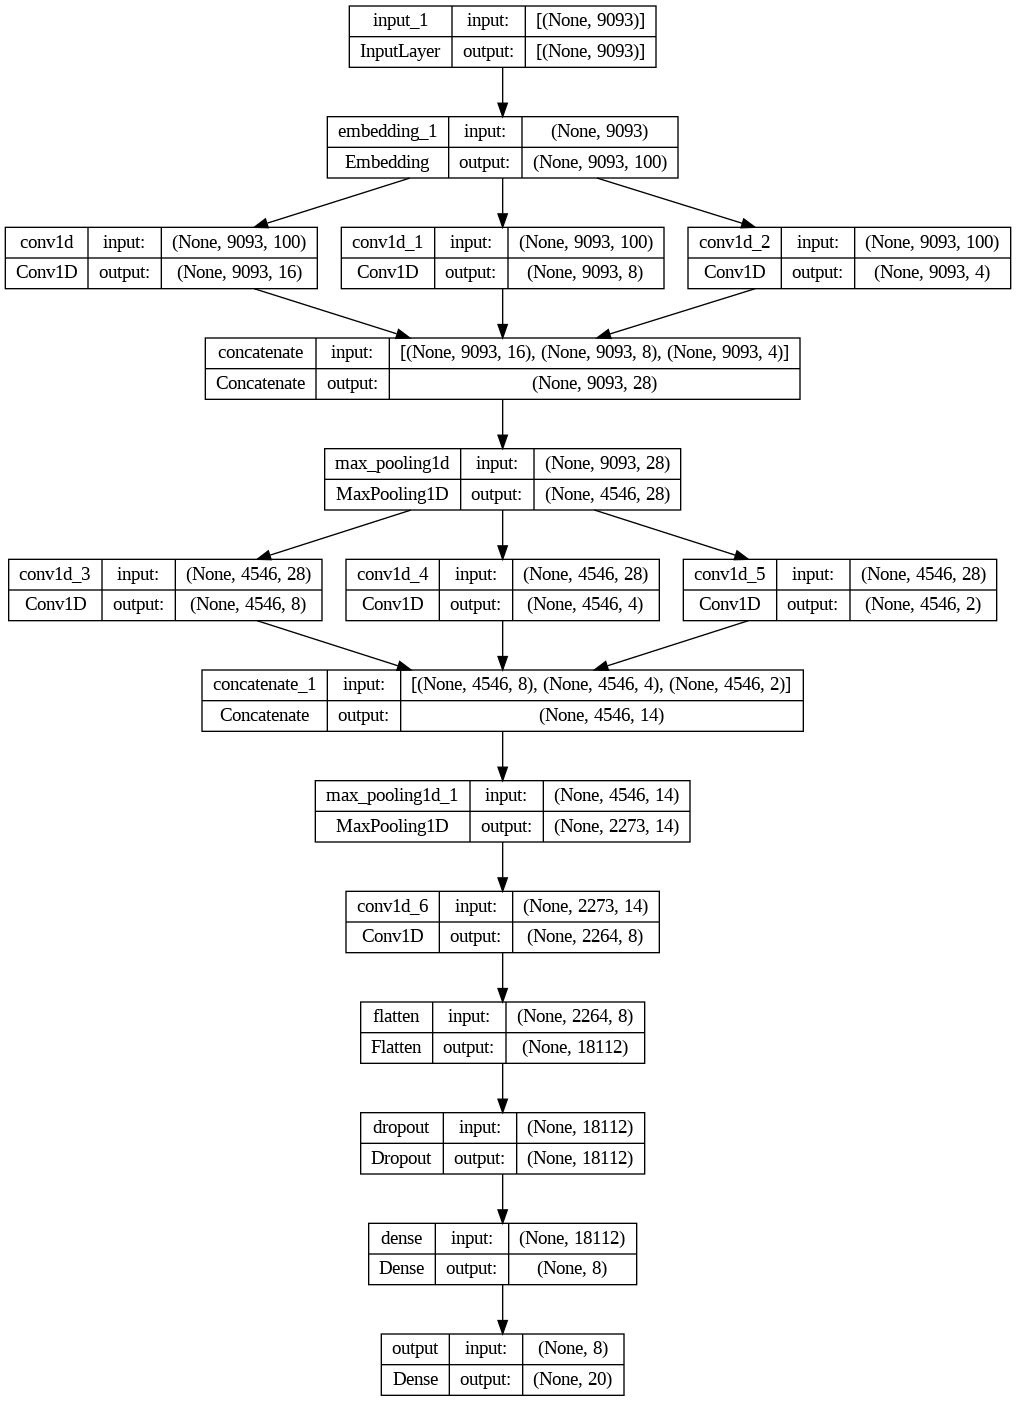

In [32]:
tf.keras.utils.plot_model(
    model1,
    to_file='model1.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

## Model 2

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath1="best_model_2/weights-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint1 = ModelCheckpoint(filepath=filepath1, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='max')

In [31]:
input_ = Input(shape=(9093,))
embedding = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length= max_len, trainable=False)(input_)

conv1 = Conv1D(filters=8, kernel_size=10, activation='relu', padding = 'same')(embedding)
conv2 = Conv1D(filters=4, kernel_size=10, activation='relu', padding = 'same')(conv1)
max_pool1 = MaxPool1D()(conv2)

conv3 = Conv1D(filters=6, kernel_size=10, activation='relu', padding = 'same')(max_pool1)
conv4 = Conv1D(filters=3, kernel_size=10, activation='relu', padding = 'same')(conv3)
max_pool2 = MaxPool1D()(conv4)

flatten = Flatten()(max_pool2)
drop = Dropout(0.2)(flatten)
dense = Dense(8, activation="relu")(drop)

output = Dense(20, activation="softmax", name="output")(dense)

model2 = Model(inputs=[input_], outputs=[output])

callback_list = [metrics,checkpoint1, earlystop, tensorboard_callback ]


model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss= 'sparse_categorical_crossentropy' ,metrics=['accuracy'])

model2.fit(Xtrain,y_train, epochs=10, validation_data = (Xtest,y_test), callbacks = callback_list)

Epoch 1/10
  5/442 [..............................] - ETA: 15s - loss: 2.9916 - accuracy: 0.0500

148/148 [==============================] - 1s 9ms/step
F1_micro:  0.10537497344380711

Epoch 1: val_accuracy improved from -inf to 0.10537, saving model to best_model_2/weights-01-0.1054.h5
442/442 [==============================] - 26s 52ms/step - loss: 2.8074 - accuracy: 0.0996 - val_loss: 2.6354 - val_accuracy: 0.1054
Epoch 2/10
148/148 [==============================] - 1s 9ms/step
F1_micro:  0.13171871680475886

Epoch 2: val_accuracy improved from 0.10537 to 0.13172, saving model to best_model_2/weights-02-0.1317.h5
442/442 [==============================] - 22s 49ms/step - loss: 2.5381 - accuracy: 0.1258 - val_loss: 2.4655 - val_accuracy: 0.1317
Epoch 3/10
148/148 [==============================] - 1s 9ms/step
F1_micro:  0.16146165285744635

Epoch 3: val_accuracy improved from 0.13172 to 0.16146, saving model to best_model_2/weights-03-0.1615.h5
442/442 [==============================] - 21s 48ms/step - loss: 2.4067 - accuracy: 0.1625 - val_loss: 2.3837 - val_accuracy: 0.1615
Epo

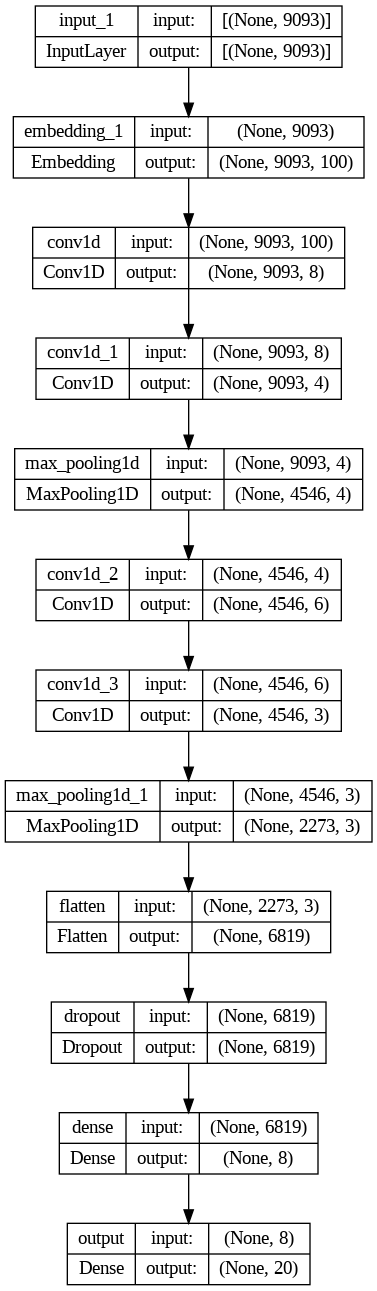

In [32]:
tf.keras.utils.plot_model(
    model2,
    to_file='model2.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)